# DODAJ NASLOV

<br>

**Sadržaj:**
* 1.[Općenito o grafovima](#uvod)
* 2.[Pretraživanje prostora stanja](#pps)
    * 2.1 [BFS](#bfs)
    * 2.2 [DFS](#dfs)
* 3.[Primjena BFS i DFS](#labirint)
* 4.[Zaključak](#kraj)
* 5.[Literatura](#lit)

## Općenito o grafovima <a name="uvod"></a>


**Def:** <i>**Jednostavan graf G** sastoji se od nepraznog konačnog skupa skupa V čije
elemente zovemo **vrhovi** i konačnog skupa E različitih parova elemenata V koje
zovemo **bridovi**.</i>

Smatramo da je graf zadan ako su zadani njegovi skupovi vrhova i bridova. Označavamo ga s **G(V,E)**.

**Oznake:**
* U teoremima i definicijama vrhove obično označavamo malim slovima  *u,v*, a bridove slovima *e,f*. 
* Brid između vrhova *u* i *v* označavamo sa *e={u,v}* ili *e=uv*. 
* U grafovima vrhove označavamo velikim tiskanim slovima A,B,C, ...
<br><br>

**Def:** <i>Za vrhove u i v kažemo da su ***susjedni*** ako postoji brid *e=uv* u tom grafu koji
ih spaja. Za bridove e i f kažemo da su susjedni ako postoji vrh u u tom grafu koji je njima
zajednički.</i> 
<br><br>


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

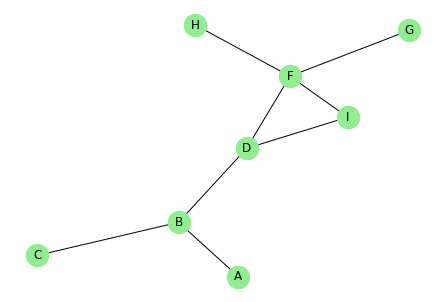

In [2]:
df = pd.DataFrame({'source': ['A', 'B','B','D','F','F','D','I'],
                   'target': ['B','C','D','F','G','H','I','F']})
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(df)
nx.draw(g1, with_labels=True, node_color="lightgreen", node_shape='o', node_size=500)
plt.draw()

    Slika 1. Primjer grafa

**Def:** <i>**Put u grafu G** je konačan slijed bridova v1v2,v2v3,…,vn-1vn u kojem su svaka
dva brida susjedna i svi su vrhovi različiti, osim eventualno početni i krajnji. Put možemo
označavati i kao v1 → v2 → v3 → ... → vn.</i>

**Def:** <i>Za graf G kažemo da je **povezan** onda i samo onda ako postoji put između
svaka dva vrha.</i>
<br><br>

Na slici 1. vidimo primjer povezanog grafa, a u donjem primjeru ćemo vidjeti primjer nepovezanog.

In [3]:
g1.remove_node('D')

g1.nodes() #ispisuje nam sve vrhove u grafu 

NodeView(('A', 'B', 'C', 'F', 'G', 'H', 'I'))

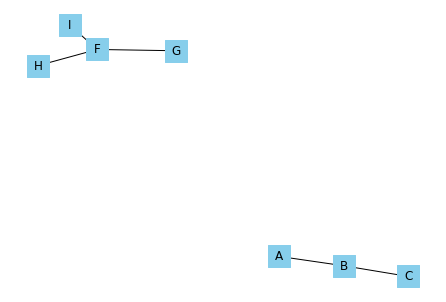

In [43]:
nx.draw(g1, with_labels=True, node_color="skyblue", node_shape='s', node_size=500)
plt.show()

    Slika 2. Primjer nepovezanog grafa

**Def:** *Kažemo da je graf **potpuno povezan** ako su svaka dva vrha u grafu povezana točno jednim bridom.*

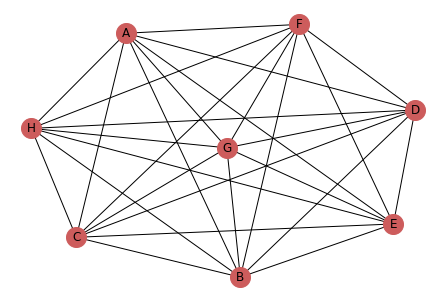

In [42]:
g2=nx.Graph()
nodes2=np.array(['A','B','C','D','E','F','G','H'])
n=nodes2.size
for i in range(0,n,1):
    g2.add_node(nodes2[i])
    
g2=nx.complete_graph(g2.nodes())

nx.draw(g2, with_labels=True, node_size=400, node_shape='o', node_color="indianred")

    Slika 3. Primjer potpuno povezanog grafa

* 1.TU TREBA SMISLITI NEKI PRIJELAZ
* 2.POGLEDATI MOZE LI SE MIJENJATI FONT

## Pretraživanje prostora stanja <a name="pps"></a>

### BFS <a name="bfs"></a>

### DFS <a name="dfs"></a>

## Primjena BFS i DFS <a name="labirint"></a>

## Zaključak <a name="kraj"></a>

## Literatura: <a name="lit"></a>
* http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf 
* https://networkx.github.io/documentation/networkx-2.4/reference/index.html
* https://web.math.pmf.unizg.hr/nastava/komb/predavanja/predavanja.pdf
* http://www.zemris.fer.hr/predmeti/mr/arhiva/2002-2003/seminari/finished/pdf/grafovi.pdf 
